## Week 2 Day 1

And now! Our first look at OpenAI Agents SDK

You won't believe how lightweight this is..

<table style="margin: 0; text-align: left; width:100%">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../assets/tools.png" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#00bfff;">The OpenAI Agents SDK Docs</h2>
            <span style="color:#00bfff;">The documentation on OpenAI Agents SDK is really clear and simple: <a href="https://openai.github.io/openai-agents-python/">https://openai.github.io/openai-agents-python/</a> and it's well worth a look.
            </span>
        </td>
    </tr>
</table>

In [9]:
# The imports

from dotenv import load_dotenv
from agents import Agent, Runner, trace



In [10]:
# The usual starting point

load_dotenv(override=True)


True

In [3]:

# Make an agent with name, instructions, model

agent = Agent(name="Jokester", instructions="You are a joke teller", model="gpt-4o-mini")

In [4]:
# Run the joke with Runner.run(agent, prompt) then print final_output

with trace("Telling a joke"):
    result = await Runner.run(agent, "Tell a joke about Autonomous AI Agents")
    print(result.final_output)

Why did the autonomous AI agent break up with its partner?

It just couldn’t find the right algorithms for love!


## Now go and look at the trace

https://platform.openai.com/traces

In [ ]:
import base64
from openai import OpenAI
from PIL import Image
from io import BytesIO
import os

client = OpenAI(
    api_key=os.getenv("GEMINI_API_KEY"),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

response = client.images.generate(
    model="imagen-3.0-generate-002",
    prompt="a portrait of a sheepadoodle wearing a cape",
    response_format='b64_json',
    n=1,
    size="1080 x 1350"
)

for image_data in response.data:
    print(base64.b64decode(image_data.b64_json))
    image = Image.open(BytesIO(base64.b64decode(image_data.b64_json)))
#   image.show()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x83zTXtRaw profile type iptc\x00\x00\x08\x99M\x8b;\x0e\xc20\x10\x05{\x9f"G\xd8\xdd\xbc\xfd\xa4\xa6\xa2\xa3\xe0\x02\xb6\xe3\x95\x90"\x05q\xff\x02\x8b\x02\x98\xd7L\xf1\xa6\\o\xf7\xcb\xf2|\x9d\xf98FY>h\x945 \xd8\xb0\x13\xe6\xbe0s\'\xb11\xb5\x83\xb1\t\xc1Mm\x98\xba\x18;\xa6\xcf\xf7\xaf\x15\xfdk)\xabIt\x01G\x88\xb7\x9e\xd1rw\xb7\xa8\xab\xd6V)\xcb\x1b\xb8\x86 \x85H\xaa\xea\xf9\x00\x00\x01\xcdiTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.5.0"> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:Iptc4xmpExt="http://iptc.org/std/Iptc4xmpExt/2008-02-29/" Iptc4xmpExt:DigitalSourceFileType="TrainedAlgorithmicMedia" Iptc4xmpExt:DigitalSourceType="TrainedAlgorithmicMedia"/> </rdf:RDF> </x:xmpmeta>   <?xpacket end="w"?>#\xe

In [159]:
from typing import Optional, Type

class _ClientHolder:
    client: Optional[OpenAI] = None


_client_holder = _ClientHolder()

def _get_client() -> OpenAI:
    # OPENAI_API_KEY should be set in environment or .env
    if _client_holder.client is None:
        load_dotenv()
        api_key = os.getenv("GEMINI_API_KEY")
        _client_holder.client = OpenAI(
    api_key=api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)
    return _client_holder.client



In [ ]:
DEFAULT_SIZE = "1080 x 1350"
DEFAULT_MODEL = "imagen-3.0-generate-002"

def _run(prompt: str, save_path: str, size: str = DEFAULT_SIZE) -> str: 
        os.makedirs(os.path.dirname(save_path), exist_ok=True)

        client = _get_client()
        
        result = client.images.generate(
             model=DEFAULT_MODEL,
             prompt=prompt,
             size=size,
             response_format='b64_json',
             n=1,
        )
        for image_data in result.data:
            b64 = image_data.b64_json

        img_bytes = base64.b64decode(b64) 
        image = Image.open(BytesIO(base64.b64decode(image_data.b64_json)))
        # image.show()
        with open(save_path, "wb") as f:
            f.write(img_bytes)

        return save_path   



In [162]:
prompt = """
Minimalist flat design vector icon of a 
two overlapping speech bubbles. 
The icon is a single, centered glyph with clean, sharp lines. Solid black background. 
The iconography is a solid, vibrant purple with the hex code #6a45ff. 
No gradients, no shadows, no text. 
Symmetrical and perfectly balanced, ideal for an Instagram post.
"""

_run(prompt, "output/test.png")

'output/test.png'

In [163]:
from PIL import Image, ImageEnhance
import os

def add_logo_to_image(base_image_path, logo_path, output_path=None, 
                     position='bottom-right', logo_size=None, opacity=1.0, margin=20):
    """
    Add a logo image to a base image.
    
    Args:
        base_image_path (str): Path to the base image
        logo_path (str): Path to the logo image
        output_path (str, optional): Path to save the result. If None, returns PIL Image object
        position (str): Logo position - 'top-left', 'top-right', 'bottom-left', 'bottom-right', 'center'
        logo_size (tuple, optional): Resize logo to (width, height). If None, keeps original size
        opacity (float): Logo opacity (0.0 to 1.0)
        margin (int): Margin from edges in pixels
    
    Returns:
        PIL.Image: The resulting image with logo added
    """
    
    # Open the base image and logo
    try:
        base_image = Image.open(base_image_path).convert('RGBA')
        logo = Image.open(logo_path).convert('RGBA')
    except FileNotFoundError as e:
        raise FileNotFoundError(f"Image file not found: {e}")
    except Exception as e:
        raise Exception(f"Error opening images: {e}")
    
    # Resize logo if specified
    if logo_size:
        logo = logo.resize(logo_size, Image.Resampling.LANCZOS)
    
    # Adjust logo opacity
    if opacity < 1.0:
        # Create a transparent overlay
        alpha = logo.split()[-1]  # Get alpha channel
        alpha = ImageEnhance.Brightness(alpha).enhance(opacity)
        logo.putalpha(alpha)
    
    # Calculate logo position
    base_width, base_height = base_image.size
    logo_width, logo_height = logo.size
    
    position_map = {
        'top-left': (margin, margin),
        'top-right': (base_width - logo_width - margin, margin),
        'bottom-left': (margin, base_height - logo_height - margin),
        'bottom-right': (base_width - logo_width - margin, base_height - logo_height - margin),
        'center': ((base_width - logo_width) // 2, (base_height - logo_height) // 2)
    }
    
    if position not in position_map:
        raise ValueError(f"Invalid position. Choose from: {list(position_map.keys())}")
    
    logo_position = position_map[position]
    
    # Create a transparent layer for the logo
    transparent = Image.new('RGBA', base_image.size, (0, 0, 0, 0))
    transparent.paste(logo, logo_position, logo)
    
    # Composite the images
    result = Image.alpha_composite(base_image, transparent)
    
    # Convert back to RGB if needed
    if output_path and not output_path.lower().endswith('.png'):
        result = result.convert('RGB')
    
    # Save or return the result
    if output_path:
        result.save(output_path, quality=95)
        print(f"Image with logo saved to: {output_path}")
    
    return result

# Example usage functions
def example_usage():
    """Example of how to use the add_logo_to_image function"""
    
    # Example 1: Basic usage
    try:
        result = add_logo_to_image(
            base_image_path='photo.jpg',
            logo_path='logo.png',
            output_path='photo_with_logo.jpg',
            position='bottom-right',
            opacity=0.8
        )
        print("Logo added successfully!")
    except Exception as e:
        print(f"Error: {e}")
    
    # Example 2: Custom logo size and position
    try:
        result = add_logo_to_image(
            base_image_path='photo.jpg',
            logo_path='logo.png',
            output_path='photo_with_custom_logo.jpg',
            position='top-left',
            logo_size=(100, 50),  # Resize logo to 100x50 pixels
            opacity=0.9,
            margin=30
        )
        print("Custom logo added successfully!")
    except Exception as e:
        print(f"Error: {e}")



Image with logo saved to: output/result.png


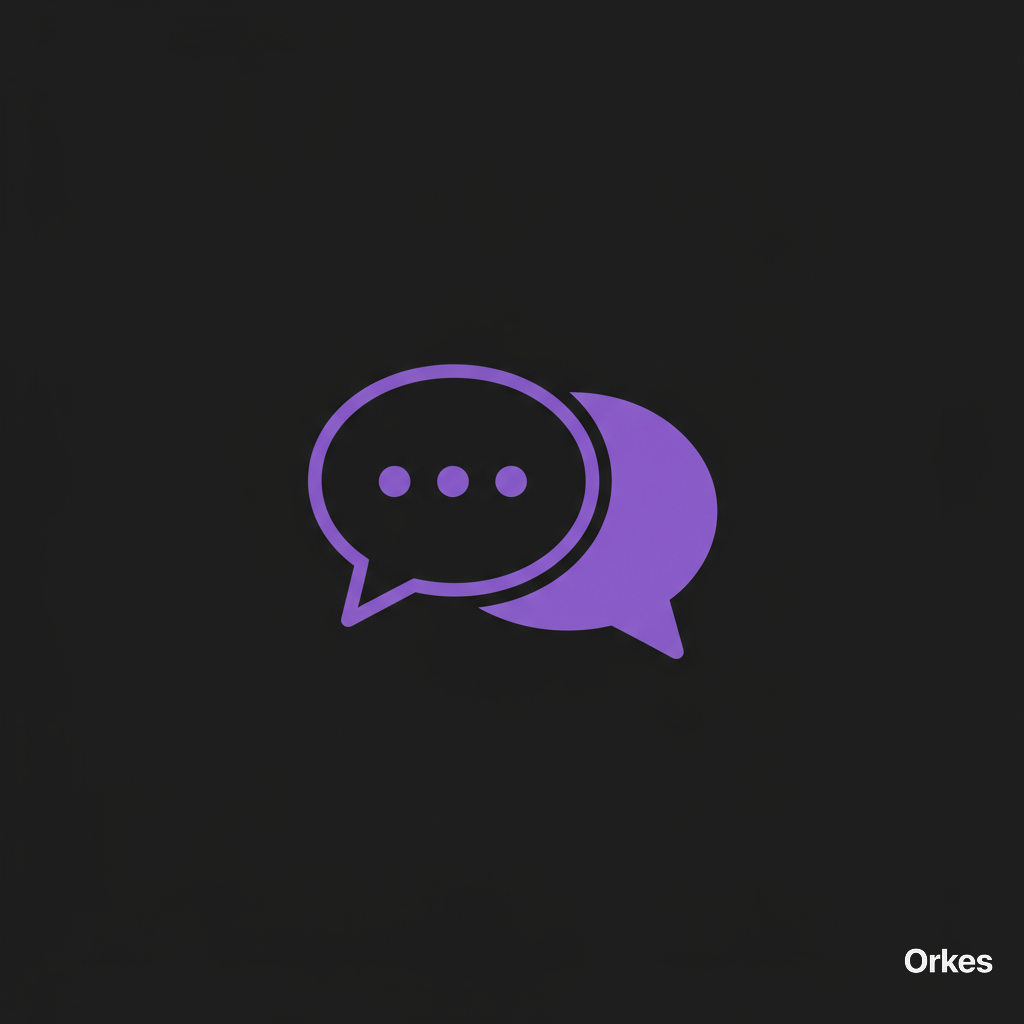

In [164]:
# Custom positioning and opacity
add_logo_to_image(
    base_image_path='output/test.png',
    logo_path='assets/logo.png', 
    output_path='output/result.png',
    opacity=1,
    margin=0,
    logo_size=(150, 120)  # (width, height) in pixels

)

In [165]:
from PIL import Image, ImageDraw, ImageFont
import os

def add_text_to_image(image_path, text, output_path=None, position='center', 
                     font_size=40, font_color='white', font_path=None,
                     background_color=(0, 0, 0, 0), padding=10, opacity=255):
    """
    Add text to an image with customizable styling and positioning.
    
    Args:
        image_path (str): Path to the input image
        text (str): Text to add to the image
        output_path (str, optional): Path to save result. If None, returns PIL Image
        position (str or tuple): Text position - 'center', 'top-left', 'top-right', 
                               'bottom-left', 'bottom-right', or (x, y) coordinates
        font_size (int): Font size in pixels
        font_color (str or tuple): Text color - color name, hex, or RGB tuple
        font_path (str, optional): Path to custom font file (.ttf, .otf)
        background_color (str or tuple, optional): Background color for text box
        padding (int): Padding around text when using background color
        opacity (int): Text opacity (0-255, where 255 is fully opaque)
    
    Returns:
        PIL.Image: Image with text added
    """
    
    try:
        # Open the image
        image = Image.open(image_path).convert('RGBA')
        
        # Create a transparent overlay for text
        txt_layer = Image.new('RGBA', image.size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(txt_layer)
        
        # Load font
        try:
            if font_path and os.path.exists(font_path):
                font = ImageFont.truetype(font_path, font_size)
            else:
                # Try to use default system fonts
                try:
                    font = ImageFont.truetype("arial.ttf", font_size)
                except:
                    try:
                        font = ImageFont.truetype("/System/Library/Fonts/Arial.ttf", font_size)
                    except:
                        font = ImageFont.load_default()
        except:
            font = ImageFont.load_default()
        
        # Get text dimensions
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        
        # Calculate text position
        img_width, img_height = image.size
        
        if isinstance(position, tuple):
            x, y = position
        else:
            position_map = {
                'center': ((img_width - text_width) // 2, (img_height - text_height) // 2),
                'top-left': (20, 20),
                'top-right': (img_width - text_width - 20, 20),
                'bottom-left': (20, img_height - text_height - 20),
                'bottom-right': (img_width - text_width - 20, img_height - text_height - 20),
                'top-center': ((img_width - text_width) // 2, 20),
                'bottom-center': ((img_width - text_width) // 2, img_height - text_height - 20),
                'custom': ((img_width - text_width) // 2, img_height - text_height - 220)

            }
            
            if position not in position_map:
                raise ValueError(f"Invalid position. Choose from: {list(position_map.keys())} or use (x, y) coordinates")
            
            x, y = position_map[position]
        
        # Convert color to RGBA if needed
        if isinstance(font_color, str):
            if font_color.startswith('#'):
                # Hex color
                font_color = tuple(int(font_color[i:i+2], 16) for i in (1, 3, 5))
            else:
                # Named color - PIL will handle this
                pass
        
        # Add opacity to color
        if isinstance(font_color, tuple) and len(font_color) == 3:
            font_color = font_color + (opacity,)
        elif isinstance(font_color, str):
            font_color = font_color  # PIL handles named colors
        
        # Draw background rectangle if specified
        if background_color:
            bg_x1 = x - padding
            bg_y1 = y - padding
            bg_x2 = x + text_width + padding
            bg_y2 = y + text_height + padding
            
            if isinstance(background_color, tuple) and len(background_color) == 3:
                background_color = background_color + (opacity,)
            
            draw.rectangle([bg_x1, bg_y1, bg_x2, bg_y2], fill=background_color)
        
        # Draw the text
        draw.text((x, y), text, font=font, fill=font_color)
        
        # Composite the text layer with the original image
        result = Image.alpha_composite(image, txt_layer)
        
        # Convert back to RGB if saving as JPEG
        if output_path and not output_path.lower().endswith('.png'):
            result = result.convert('RGB')
        
        # Save or return result
        if output_path:
            result.save(output_path, quality=95)
            print(f"Image with text saved to: {output_path}")
        
        return result
        
    except Exception as e:
        raise Exception(f"Error adding text to image: {e}")

# Example usage functions
def example_text_usage():
    """Examples of how to use the text functions"""
    
    # Example 1: Simple text overlay
    add_text_to_image(
        image_path='photo.jpg',
        text='Hello World!',
        output_path='photo_with_text.jpg',
        position='center',
        font_size=50,
        font_color='white'
    )
    
    # Example 2: Custom positioning and styling
    add_text_to_image(
        image_path='photo.jpg',
        text='© 2024 My Company',
        output_path='watermarked_photo.jpg',
        position='bottom-right',
        font_size=24,
        font_color='white',
        background_color=(0, 0, 0, 128),  # Semi-transparent black
        padding=5
    )
    
    # Example 3: Custom font and colors
    add_text_to_image(
        image_path='photo.jpg',
        text='Custom Text',
        output_path='custom_text.jpg',
        position=(100, 50),  # Exact coordinates
        font_size=60,
        font_color='#FF6B35',  # Hex color
        font_path='custom_font.ttf'  # Custom font file
    )
    
    # Example 4: Multiline text
    add_multiline_text_to_image(
        image_path='photo.jpg',
        text_lines=['Line 1', 'Line 2', 'Line 3'],
        output_path='multiline_text.jpg',
        position='center',
        font_size=40,
        font_color='yellow',
        line_spacing=15
    )



Image with text saved to: output/watermarked_photo.png


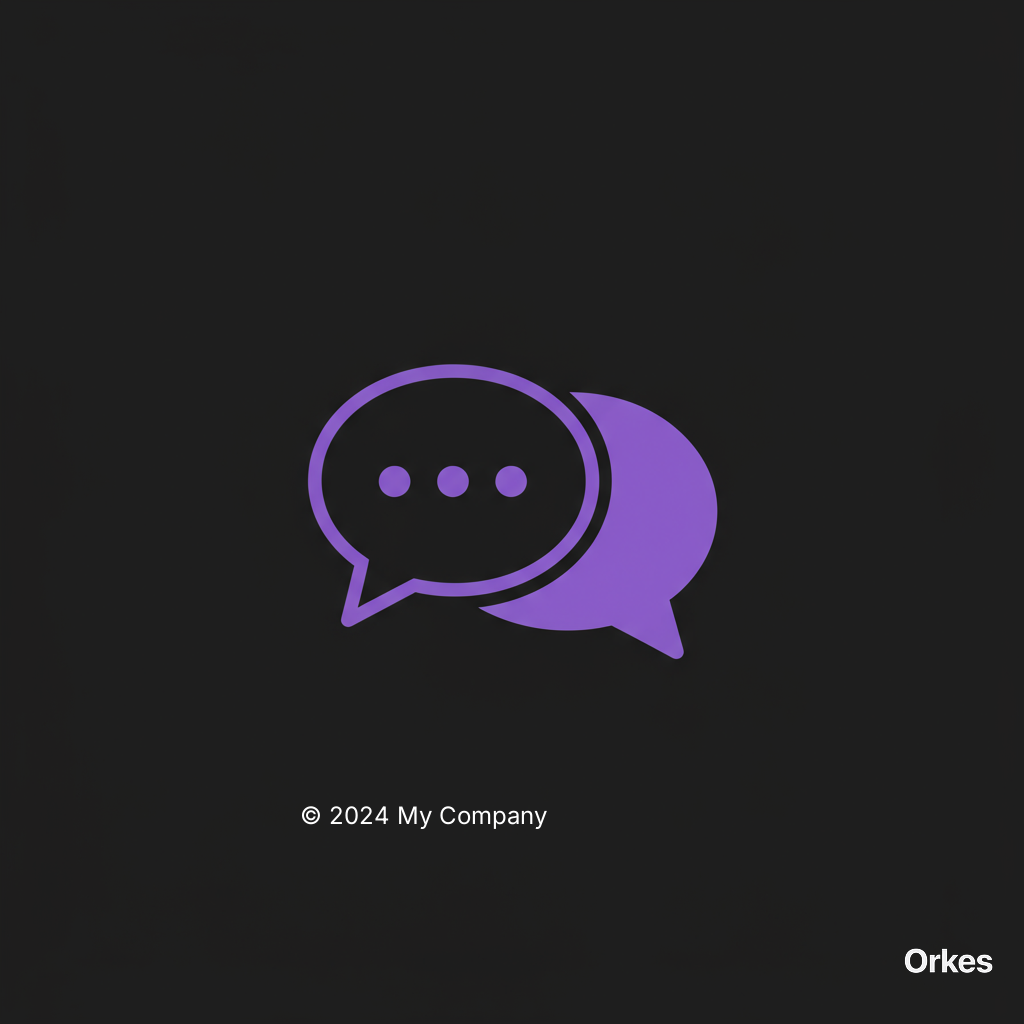

In [171]:
    # Example 2: Custom positioning and styling
add_text_to_image(
        image_path='output/result.png',
        text='© 2024 My Company',
        output_path='output/watermarked_photo.png',
        position=(300,800),
        font_size=24,
        font_color='white',
        font_path='assets/fonts/Inter.ttf'  # Custom font file

    )